# Lagrange
polinomial interpolasi Lagrange adalah polinomial unik dengan derajat terendah yang menginterpolasi serangkaian data tertentu.Nama polinom ini 
diambil dari nama penemunya, yaitu Joseph Louis Lagrange yang berkebangsaan 
Perancis. <br>
Secara matematis, hal tersebut dapat dituliskan sebagai berikut <br>
$\displaystyle L(x)=\sum _{i=0}^{n}y_{i}\ell _{i}(x)$ <br>
dimana<br>
$\displaystyle {\begin{aligned}\ell _{i}(x)&={\frac {(x-x_{0})}{(x_{i}-x_{0})}}\cdots {\frac {(x-x_{i-1})}{(x_{i}-x_{i-1})}}{\frac {(x-x_{i+1})}{(x_{i}-x_{i+1})}}\cdots {\frac {(x-x_{k})}{(x_{i}-x_{k})}}\\[8mu]&=\prod _{\begin{smallmatrix}0\leq m\leq k\\m\neq i\end{smallmatrix}}{\frac {x-x_{m}}{x_{i}-x_{m}}}{\vphantom {\Bigg |}}.\end{aligned}}$



+---+----------------------+
| i |          L           |
+---+----------------------+
| 0 | -0.03999999999999995 |
| 1 |  0.7200000000000013  |
| 2 |  0.3199999999999987  |
+---+----------------------+
hasil dari 9.2 = 2.219224
galat = 2.051594500551701e-05


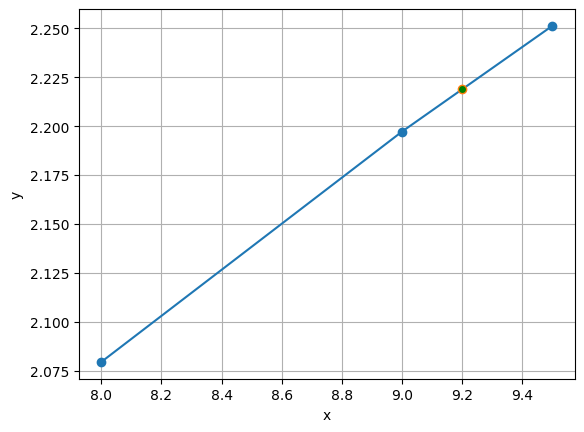

In [47]:
import math
import matplotlib.pyplot as plt
from tabulate import tabulate

data = []                          
headers = ["i","L"] 

def Lagrange(x,y,x_input):
    n = len(x)
    output_y = 0

    for i in range(n):
        L = 1
        for j in range (n):
            if j != i:
                L *= (x_input -x[j])/(x[i]-x[j])
        data.append([i,L])
        output_y += y[i] * L
    return output_y
        
x = [8,9,9.5]
y = [2.0794,2.1972,2.2513]

x_input = 9.2
y_excact = math.log(x_input) 
y_predict = Lagrange(x,y,x_input)

print(tabulate(data, headers=headers, tablefmt="pretty")) 
print(f"hasil dari {x_input} = {y_predict}")
print(f"galat = {abs(y_excact - y_predict)}")


plt.plot(x, y, marker ="o")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(9.2, y_predict, marker="o", markerfacecolor="green")
plt.show()

# Polinomial Newton
Polinomial Newton adalah interpolasi polinomial untuk suatu himpunan titik data yang diketahui. Polinomial ini dinamai dari penemunya, Isaac Newton. Terkadang, polinomial ini disebut interpolasi polinomial beda terbagi Newton karena koefisien dari polinomialnya dihitung menggunakan metode beda terbagi Newton.<br>
Secara matematis, hal tersebut dapat dituliskan sebagai berikut <br>
$\displaystyle f{{\left({x}\right)}}={\sum_{{{n}={0}}}^{\infty}}{f}{\left[{x}_{{i}},{x}_{{{i}-{1}}},..{x}_{{0}}\right]}\cdot{\prod_{{{{}_{{{i}\ne{j}}}^{{{j}={0}}}}}}^{{i}}}{\left({x}-{x}_{{j}}\right)}$

+---+----------+
| i |    y     |
+---+----------+
| 0 |  2.0794  |
| 1 | 2.22076  |
| 2 | 2.219224 |
+---+----------+
hasil dari 9.2 = 2.219224
galat = 2.051594500551701e-05


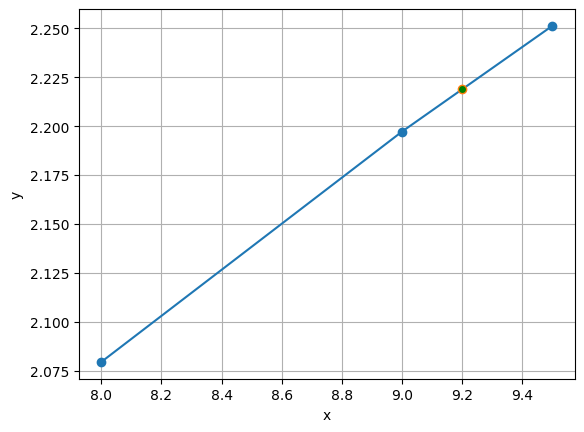

In [48]:
import math
import matplotlib.pyplot as plt
from tabulate import tabulate

data = []                          
headers = ["i","y"] 

def rekursif_a(x,y,i,j):
    if i == j:
        return y[i]
    else:
       return (rekursif_a(x,y,i+1,j)-rekursif_a(x,y,i,j-1))/ (x[j]-x[i])
        
def produktori(x,x_input,a):
    hasil = 1
    
    for i in range(a):
        hasil *= (x_input-x[i])
    return hasil

def newton(x,y,x_input):
    n = len(x)
    output_y = 0
    
    for i in range(n):
        output_y += rekursif_a(x,y,0,i)*produktori(x,x_input,i)
        data.append([i,output_y])
    return output_y

x = [8,9,9.5]
y = [2.0794,2.1972,2.2513]

x_input = 9.2
y_excact = math.log(x_input) 
y_predict = newton(x,y,x_input)

print(tabulate(data, headers=headers, tablefmt="pretty")) 
print(f"hasil dari {x_input} = {y_predict}")
print(f"galat = {abs(y_excact - y_predict)}")

plt.plot(x, y, marker ="o")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(9.2, y_predict, marker="o", markerfacecolor="green")
plt.show()

# Neville
Dalam matematika, algoritma Neville adalah algoritma yang digunakan untuk interpolasi polinomial yang dibuat oleh matematikawan Eric Harold Neville pada tahun 1934.
Metode Neville mengevaluasi polinomial yang melewati sekumpulan titik x dan y tertentu untuk nilai x tertentu menggunakan bentuk polinomial Newton.<br>
Misalkan p i , j menyatakan polinomial berderajat j − i yang melalui titik ( x k , y k ) untuk k = i , i + 1, ..., j . P i , j memenuhi relasi rekursif<br>
$\displaystyle p_{i,i}(x)=y_{i},\,$ 
$\displaystyle 0\leq i\leq n,\,$<br>

$\displaystyle p_{i,j}(x)={\frac {(x-x_{i})p_{i+1,j}(x)-(x-x_{j})p_{i,j-1}(x)}{x_{j}-x_{i}}},\,$
$\displaystyle 0\leq i<j\leq n.\,$

hasil dari 9.2 = 2.219224
galat = 2.051594500551701e-05


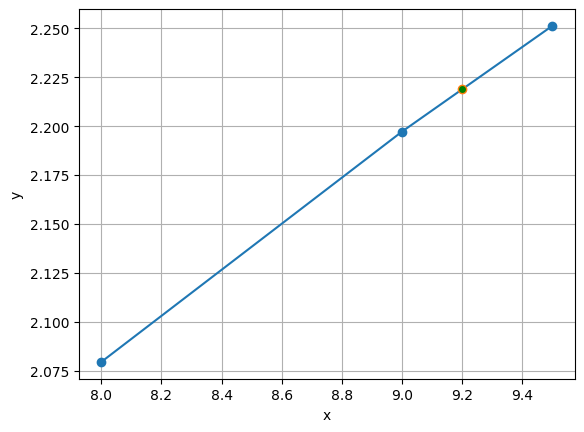

In [52]:
import math
import matplotlib.pyplot as plt
from tabulate import tabulate

data = []                          
headers = ["i","y"] 

def neville(x,y,x_input):
    k = len(x)-1

    def rekursif_p(x,y,i,k,x_input):
        if k == 0:
            return y[i]
        else:
            return ((x_input-x[i])*rekursif_p(x,y,i+1,k-1,x_input)-(x_input-x[i+k])*rekursif_p(x,y,i,k-1,x_input))/(x[i+k]-x[i])

    return rekursif_p(x,y,0,k,x_input)

x = [8,9,9.5]
y = [2.0794,2.1972,2.2513]

x_input = 9.2
y_excact = math.log(x_input) 
y_predict = neville(x,y,9.2)

print(f"hasil dari {x_input} = {y_predict}")
print(f"galat = {abs(y_excact - y_predict)}")

plt.plot(x, y, marker ="o")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(9.2, y_predict, marker="o", markerfacecolor="green")
plt.show()